# Práctica 1 Validación simple y cruzada y Naive-Bayes
## Validación cruzada y simple
En esta práctica se han implementado dos estrategias de validación:

* Validación simple: el conjunto se divide en dos conjuntos, entrenamiento y test según un porcentaje configurable. Se realiza un shuffle previo a los datos.

In [67]:
import numpy as np
from datos import Datos
from estrategiasparticionado.validacion_simple import ValidacionSimple
dataset=Datos('./conjunto_datos/tic-tac-toe.data')
dataset2=Datos('./conjunto_datos/german.data')

validacionSimple = ValidacionSimple()
validacionSimple.porcentajeEntrenamiento = 0.7 # Valor por defecto
validacionSimple.creaParticiones(dataset.datos)
for k, particion in enumerate(validacionSimple.particiones):
    print('Partición', k+1)
    print('Entrenamiento: ', particion.indicesTrain[:15], '...')
    print('Validación', particion.indicesTest[:15], '...')

Partición 1
Entrenamiento:  [ 53 688 376 817 663 213 525 263 927 783 893 679  18 899 592] ...
Validación [602 496 748 505 612 673 876  22 741 308 646 140  94 139 604] ...


* Validación cruzada se crean K-folds, esto es K particiones de los datos en entrenamiento y test. Cada partición j tendrá a la j-ésima partición como test y el resto para entrenamiento.

In [68]:
from estrategiasparticionado.validacion_cruzada import ValidacionCruzada

validacionCruzada = ValidacionCruzada()
validacionCruzada.nfolds = 10 # Valor por defecto
validacionCruzada.creaParticiones(dataset.datos)
for k, particion in enumerate(validacionCruzada.particiones):
    print('Partición', k+1)
    print('Entrenamiento: ', particion.indicesTrain[:15], '...')
    print('Validación', particion.indicesTest[0][:15], '...')


Partición 1
Entrenamiento:  [919 812 817 337 313 859 860 235 927 702 436 367 862 550 557] ...
Validación [379 822 571 698 858 670 430 201 373 215 931 916 341  84 376] ...
Partición 2
Entrenamiento:  [379 822 571 698 858 670 430 201 373 215 931 916 341  84 376] ...
Validación [919 812 817 337 313 859 860 235 927 702 436 367 862 550 557] ...
Partición 3
Entrenamiento:  [589 498 297 588 662 920 830 262 552 378 701 877 175 178 403] ...
Validación [919 812 817 337 313 859 860 235 927 702 436 367 862 550 557] ...
Partición 4
Entrenamiento:  [836 507 573 897 158 193 744  38 100 666 483 551 678 780 328] ...
Validación [919 812 817 337 313 859 860 235 927 702 436 367 862 550 557] ...
Partición 5
Entrenamiento:  [831 349 346 416 851 777 747 918 838 664 432 249 300 381 375] ...
Validación [919 812 817 337 313 859 860 235 927 702 436 367 862 550 557] ...
Partición 6
Entrenamiento:  [646 648 861 881 317 218 399 624 773 715 222 803 340 177  68] ...
Validación [919 812 817 337 313 859 860 235 927 702

## Apartado 1: Naive-Bayes
A continuación se muestra para cada uno de los datasets los errores de predicción con o sin la corrección de Laplace
### tic-tac-toe validación simple sin Laplace

In [69]:
from clasificadores.clasificador_naive_bayes import ClasificadorNaiveBayes
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 0.0
clasificador.validacion(validacionSimple, dataset)
print('Error:', clasificador.errores)
error_tic = clasificador.errores[0]

Error: [0.28059701492537314]


### tic-tac-toe validación simple con Laplace

In [70]:
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 1.0
clasificador.validacion(validacionSimple, dataset)
print('Error:', clasificador.errores)
error_tic_laplace = clasificador.errores[0]

Error: [0.26119402985074625]


### tic-tac-toe validación cruzada sin Laplace

In [71]:
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 0.0
clasificador.validacion(validacionCruzada, dataset)
print('Errores:', clasificador.errores)
print('Error: %.4f +- %.4f' % (np.mean(clasificador.errores), 2*np.std(clasificador.errores)))
error_tic_cruzada = np.mean(clasificador.errores)

Errores: [0.17708333333333334, 0.2604166666666667, 0.22916666666666666, 0.23958333333333334, 0.2708333333333333, 0.22916666666666666, 0.2708333333333333, 0.28125, 0.22105263157894736, 0.23157894736842105]
Error: 0.2411 +- 0.0588


### tic-tac-toe validación cruzada con Laplace

In [72]:
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 1.0
clasificador.validacion(validacionCruzada, dataset)
print('Errores:', clasificador.errores)
print('Error: %.4f +- %.4f' % (np.mean(clasificador.errores), 2*np.std(clasificador.errores)))
error_tic_cruzada_laplace = np.mean(clasificador.errores)

Errores: [0.28125, 0.20833333333333334, 0.28125, 0.21875, 0.17708333333333334, 0.16666666666666666, 0.1875, 0.22916666666666666, 0.29473684210526313, 0.17894736842105263]
Error: 0.2224 +- 0.0910


### german validacion simple sin Laplace

In [73]:
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 0.0
clasificador.validacion(validacionSimple, dataset2)
print('Error:', clasificador.errores)
error_german = clasificador.errores[0]

Error: [0.25]


### german validacion simple con Laplace

In [74]:
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 1.0
clasificador.validacion(validacionSimple, dataset2)
print('Error:', clasificador.errores)
error_german_laplace = clasificador.errores[0]

Error: [0.24285714285714285]


### german validacion cruzada sin Laplace

In [75]:
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 0.0
clasificador.validacion(validacionCruzada, dataset2)
print('Errores:', clasificador.errores)
print('Error: %.4f +- %.4f' % (np.mean(clasificador.errores), 2*np.std(clasificador.errores)))
error_german_cruzada = np.mean(clasificador.errores)

Errores: [0.17, 0.13, 0.07, 0.13, 0.16, 0.2, 0.23, 0.21, 0.16, 0.17]
Error: 0.1630 +- 0.0872


### german validacion cruzada con Laplace

In [76]:
clasificador = ClasificadorNaiveBayes()
clasificador.laplace_smoothing = 1.0
clasificador.validacion(validacionCruzada, dataset2)
print('Errores:', clasificador.errores)
print('Error: %.4f +- %.4f' % (np.mean(clasificador.errores), 2*np.std(clasificador.errores)))
error_german_cruzada_laplace = np.mean(clasificador.errores)

Errores: [0.19, 0.19, 0.18, 0.2, 0.21, 0.21, 0.17, 0.24, 0.21, 0.17]
Error: 0.1970 +- 0.0410


### Apartado 2 Análisis
Los resultados obtenidos son satisfactorios con errores entre el 20% y el 30% dependiendo el dataset. En concreto, en el dataset de *tic-tac-toe* la corrección de Laplace aporta un valor añadido ya que hay muchas particiones en las que faltan datos de una clase y esto provoca una predicción erronea. En el dataset de german, por otro lado, solo parece aportar ruído ya que esto no parece afectar a la predicción.

En todos los casos se ve como la validación cruzada obtiene un error medio menor, ya que dentro de la muestra se ven valores a veces muy bajos o a veces muy altos. (std = 5%)

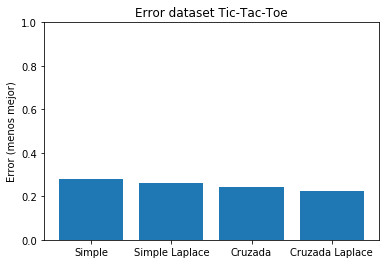

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
ind = [error_tic, error_tic_laplace, error_tic_cruzada, error_tic_cruzada_laplace]
fig, ax = plt.subplots()
plt.bar(range(4), ind)
ax.set_xticks(range(4))
ax.set_xticklabels(['Simple', 'Simple Laplace', 'Cruzada', 'Cruzada Laplace'])
ax.set_ylim([0, 1])
ax.set_ylabel('Error (menos mejor)')
ax.set_title('Error dataset Tic-Tac-Toe')

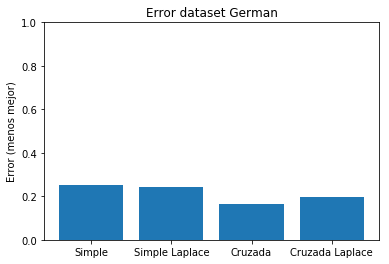

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
ind = [error_german, error_german_laplace, error_german_cruzada, error_german_cruzada_laplace]
fig, ax = plt.subplots()
plt.bar(range(4), ind)
ax.set_xticks(range(4))
ax.set_xticklabels(['Simple', 'Simple Laplace', 'Cruzada', 'Cruzada Laplace'])
ax.set_ylim([0, 1])
ax.set_ylabel('Error (menos mejor)')
ax.set_title('Error dataset German')

### Apartado 3 Scikit

In [79]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit

import itertools 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#### Codificación de los atributos

In [81]:
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
X = encAtributos.fit_transform(dataset.datos[:,:-1])
Y = dataset.datos[:,-1] 
class_names = sorted(dataset.diccionarios[-1].keys())
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)